# Predicting the Price of Used Honda Dio Motor Bike in Sri Lanka

In this Project, we are going to predict the Price of Sri Lankan Used Honda Dio Bike using various features like Brand, Price, Mileage, Year etc. The data is obtained using web scraping reputed vehecle reselling site called Riyasewana.

**To be able to predict used Honda Dio Bike market value can help both buyers and sellers.**

There are lots of individuals who are interested in Used Honda Dio used Motor Bike market at some points in their life because they wanted to sell their motor bike or buy a used motor bike. In this process, it’s a big corner to pay too much or sell less then it’s market value.

# Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Loading the raw data

In [29]:
dio=pd.read_excel("Dio.xlsx")
dio.head()

,Title,Link,Location,Price,Mileage,Date
0,Honda Dio 2017 Motorbike,https://riyasewana.com/buy/honda-dio-sale-band...,Bandaragama,"Rs. 500,000",39000,2024-01-26
1,Honda Dio 2018 Motorbike,https://riyasewana.com/buy/honda-dio-sale-gamp...,Gampaha,"Rs. 578,000",30000,2024-01-26
2,Honda DIO 2017 Motorbike,https://riyasewana.com/buy/honda-dio-sale-mata...,Matara,"Rs. 565,000",15250,2024-01-26
3,Honda Dio 2018 Motorbike,https://riyasewana.com/buy/honda-dio-sale-anur...,Anuradapura,"Rs. 535,000",44444,2024-01-26
4,Honda DIO 2017 Motorbike,https://riyasewana.com/buy/honda-dio-sale-kalu...,Kalutara,"Rs. 12,865,588",4628,2024-01-26


### Drop unwanted column

In [30]:
dio.drop("Link",axis=1,inplace=True)

### Number of rows and columns in data frame

In [31]:
dio.shape

(1907, 5)

### Check the count of duplicated rows

In [32]:
dio.duplicated().sum()

25

### Deleting duplicated rows and check the task completed successfully

In [33]:
dio.drop_duplicates(inplace=True)
dio.duplicated().sum()

0

### Check missing values included rows in data frame

In [34]:
dio.isnull().sum()

Title       0
Location    0
Price       0
Mileage     0
Date        0
dtype: int64

### Get Summarized Information of the data frame

In [35]:
dio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 1906
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1882 non-null   object
 1   Location  1882 non-null   object
 2   Price     1882 non-null   object
 3   Mileage   1882 non-null   int64 
 4   Date      1882 non-null   object
dtypes: int64(1), object(4)
memory usage: 88.2+ KB


Here Price,Date is quantitative variables; Hense we will convert into Numerical variables follwing steps

### Get Only Published Year from Date and store it as Published_Year

In [36]:
dio["Published_Year"]=pd.to_datetime(dio["Date"]).dt.year

### Get Year of manufatured from Title

In [37]:
def extract_year(text):
    year = re.findall(r'\b\d{4}\b', text)
    return year[0] if year else None

# Apply the function to the 'Title' column to create 'Year' column
dio['Manufactured_Year'] = dio['Title'].apply(extract_year)

In [38]:

dio.drop(["Title","Date"],axis=1,inplace=True)  # drop Title and Date column permanatly

### Get Number of unique value of every variables

In [39]:
dio.nunique()

Location              86
Price                197
Mileage              727
Published_Year         2
Manufactured_Year     18
dtype: int64

### Get the data types of every varible

In [40]:
dio.dtypes

Location             object
Price                object
Mileage               int64
Published_Year        int64
Manufactured_Year    object
dtype: object

### Get First 5 rows of  the data frame

In [41]:
dio.head()

,Location,Price,Mileage,Published_Year,Manufactured_Year
0,Bandaragama,"Rs. 500,000",39000,2024,2017
1,Gampaha,"Rs. 578,000",30000,2024,2018
2,Matara,"Rs. 565,000",15250,2024,2017
3,Anuradapura,"Rs. 535,000",44444,2024,2018
4,Kalutara,"Rs. 12,865,588",4628,2024,2017


### Get Unique values of Year variable & remove irelavant years from Manufactured_Year

In [42]:
dio["Manufactured_Year"].unique()
years_to_remove = ['2001', '2005', '2008']

# Filtering the DataFrame
dio = dio[~dio['Manufactured_Year'].isin(years_to_remove)]

### Convert Price into intiger format and convert it as Lacs

In [43]:
dio['Price'] = dio['Price'].str.replace('[^\d]', '', regex=True)
# Convert the column to numeric type
dio['Price'] = pd.to_numeric(dio['Price'])
dio['Price'] = dio['Price']/ 100000
dio.head()

,Location,Price,Mileage,Published_Year,Manufactured_Year
0,Bandaragama,5.00000,39000,2024,2017
1,Gampaha,5.78000,30000,2024,2018
2,Matara,5.65000,15250,2024,2017
3,Anuradapura,5.35000,44444,2024,2018
4,Kalutara,128.65588,4628,2024,2017


In [44]:
dio.isnull().sum()

Location               0
Price                730
Mileage                0
Published_Year         0
Manufactured_Year      0
dtype: int64

Here Price contain 730 missing values , we will check what happend later

### Checking Price data type converted was successfully

In [45]:
dio["Price"].dtype



dtype('float64')

### Converting Year data types as Integer

In [46]:

dio["Manufactured_Year"]=dio["Manufactured_Year"].astype(int)

### Replacing 2023,2022,2021 with 2020 due to the dio last version came from to SL 2020

In [47]:
# List of years to be replaced
years_to_replace = [2023, 2022, 2021]

# Replace the years with 2020
dio['Manufactured_Year'] = dio['Manufactured_Year'].replace(years_to_replace, 2020)

# Ensure the column is of integer type
dio['Manufactured_Year'] = dio['Manufactured_Year'].astype(int)

### Checking Location Unique values 

In [48]:
dio["Location"].unique()

array(['Bandaragama', 'Gampaha', 'Matara', 'Anuradapura', 'Kalutara',
       'Nawalapitiya', 'Kurunegala', 'Galle', 'Colombo', 'Kandy',
       'Wennappuwa', 'Kadawatha', 'Negombo', 'Horana', 'Matale',
       'Ratnapura', 'Kuliyapitiya', 'Mirigama', 'Polonnaruwa',
       'Dehiwala-Mount-Lavinia', 'Panadura', 'Matugama', 'Katunayake',
       'Chilaw', 'Embilipitiya', 'Pannala', 'Mannar', 'Puttalam',
       'Bandarawela', 'Polgahawela', 'Badulla', 'Dompe', 'Piliyandala',
       'Malabe', 'Boralesgamuwa', 'Kegalle', 'Kaduwela', 'Kalawana',
       'Mawanella', 'Minuwangoda', 'Nittambuwa', 'Hambantota', 'Weligama',
       'Elpitiya', 'Ambalangoda', 'Tangalle', 'Divulapitiya', 'Gampola',
       'Padukka', 'Kottawa', 'Battaramulla', 'Kelaniya', 'Moneragala',
       'Ja-Ela', 'Wattala', 'Welimada', 'Mahiyanganaya', 'Moratuwa',
       'Ragama', 'Marawila', 'Kandana', 'Maharagama', 'Kalmunai',
       'Beruwala', 'Nugegoda', 'Homagama', 'Trincomalee', 'Balangoda',
       'Kotte', 'Ampara', 'Dambul

### Converting location into province

In [49]:
location_to_province = {
    'Bandaragama': 'Western', 'Gampaha': 'Western', 'Matara': 'Southern', 'Anuradapura': 'North Central',
    'Kalutara': 'Western', 'Nawalapitiya': 'Central', 'Kurunegala': 'North Western', 'Galle': 'Southern',
    'Colombo': 'Western', 'Kandy': 'Central', 'Wennappuwa': 'North Western', 'Kadawatha': 'Western',
    'Negombo': 'Western', 'Horana': 'Western', 'Matale': 'Central', 'Ratnapura': 'Sabaragamuwa',
    'Kuliyapitiya': 'North Western', 'Mirigama': 'Western', 'Polonnaruwa': 'North Central',
    'Dehiwala-Mount-Lavinia': 'Western', 'Panadura': 'Western', 'Matugama': 'Western', 'Katunayake': 'Western',
    'Chilaw': 'North Western', 'Embilipitiya': 'Sabaragamuwa', 'Pannala': 'North Western', 'Mannar': 'Northern',
    'Puttalam': 'North Western', 'Bandarawela': 'Uva', 'Polgahawela': 'North Western', 'Badulla': 'Uva',
    'Dompe': 'Western', 'Piliyandala': 'Western', 'Malabe': 'Western', 'Boralesgamuwa': 'Western',
    'Kegalle': 'Sabaragamuwa', 'Kaduwela': 'Western', 'Kalawana': 'Sabaragamuwa', 'Mawanella': 'Sabaragamuwa',
    'Minuwangoda': 'Western', 'Nittambuwa': 'Western', 'Hambantota': 'Southern', 'Weligama': 'Southern',
    'Elpitiya': 'Southern', 'Ambalangoda': 'Southern', 'Tangalle': 'Southern', 'Divulapitiya': 'Western',
    'Gampola': 'Central', 'Padukka': 'Western', 'Kottawa': 'Western', 'Battaramulla': 'Western',
    'Kelaniya': 'Western', 'Moneragala': 'Uva', 'Ja-Ela': 'Western', 'Wattala': 'Western', 'Welimada': 'Uva',
    'Mahiyanganaya': 'Uva', 'Moratuwa': 'Western', 'Ragama': 'Western', 'Marawila': 'North Western',
    'Kandana': 'Western', 'Maharagama': 'Western', 'Kalmunai': 'Eastern', 'Beruwala': 'Western', 'Nugegoda': 'Western',
    'Homagama': 'Western', 'Trincomalee': 'Eastern', 'Balangoda': 'Sabaragamuwa', 'Kotte': 'Western', 'Ampara': 'Eastern',
    'Dambulla': 'Central', 'Avissawella': 'Western', 'Kiribathgoda': 'Western', 'Mulleriyawa': 'Western', 'Dankotuwa': 'North Western',
    'Kilinochchi': 'Northern', 'Pannipitiya': 'Western', 'Nawala': 'Western', 'Hikkaduwa': 'Southern', 'Batticaloa': 'Eastern',
    'Eheliyagoda': 'Sabaragamuwa', 'Kolonnawa': 'Western', 'Jaffna': 'Northern', 'Warakapola': 'Sabaragamuwa',
    'Nuwara-Eliya': 'Central', 'Welisara': 'Western'
}

# Map the 'Location' column to 'Province' using the dictionary
dio['Province'] = dio['Location'].map(location_to_province)

In [50]:
dio.head()

,Location,Price,Mileage,Published_Year,Manufactured_Year,Province
0,Bandaragama,5.00000,39000,2024,2017,Western
1,Gampaha,5.78000,30000,2024,2018,Western
2,Matara,5.65000,15250,2024,2017,Southern
3,Anuradapura,5.35000,44444,2024,2018,North Central
4,Kalutara,128.65588,4628,2024,2017,Western


### Deleting Location from data frame

In [51]:
dio.drop(["Location"],axis=1,inplace=True)

### Get statistical summrized details of dataframe (dio1)

In [52]:
dio["Province"].unique()

array(['Western', 'Southern', 'North Central', 'Central', 'North Western',
       'Sabaragamuwa', 'Northern', 'Uva', 'Eastern'], dtype=object)

In [53]:
dio.describe()

,Price,Mileage,Published_Year,Manufactured_Year
count,1148.000000,1.878000e+03,1878.000000,1878.000000
mean,11.751895,1.766338e+06,2023.396166,2016.940362
std,231.584462,5.635385e+06,0.489230,2.072645
min,1.100000,1.000000e+00,2023.000000,2009.000000
25%,4.100000,2.400000e+04,2023.000000,2016.000000
50%,4.700000,3.200000e+04,2023.000000,2017.000000
75%,5.400000,4.500000e+04,2024.000000,2018.000000
max,7850.028690,2.024013e+07,2024.000000,2020.000000


* Here also represt Price contain with some null values
* Also here price contained impossible Honda Dio price as max_price = 7850 lakhs (We eill ckeck it)
* Also as result of it average price of the dio price becomes 11 lakhs
* Also Mileage maximum mileage is approximately 202,000,00 KM (it is impossible we will check and resolve it)

#### Here we check the reason of price become null; it reason is in riyasewana some dio scooty price taken as Negotible. For that we will manage that missing values

average price in 2024
* 2009 - 225000
* 2010 - 260000
* 2011 - 280000
* 2012 - 325000
* 2013 - 355000
* 2014 - 385000
* 2015 - 420000
* 2016 - 455000
* 2017 - 495000
* 2018 - 550000
* 2019 - 600000
* 2020 - 640000


In [54]:
filtered_dio = dio[dio["Price"].isnull()]

# Select the columns Price and Manufactured_Year
result = filtered_dio[["Price", "Manufactured_Year"]]
result["Manufactured_Year"].unique()

array([2019, 2020, 2016, 2018, 2017, 2015, 2014, 2013, 2011, 2012])

In [55]:
price_replacements = {
    2009: 2.25,
    2010: 2.6,
    2011: 2.8,
    2012: 3.25,
    2013: 3.55,
    2014: 3.85,
    2015: 4.2,
    2016: 4.55,
    2017: 4.95,
    2018: 5.5,
    2019: 6,
    2020: 6.4
}

# Function to replace null values based on Manufactured_Year
def replace_null_price(row):
    if pd.isnull(row['Price']):
        return price_replacements.get(row['Manufactured_Year'], row['Price'])
    return row['Price']

# Apply the function to the Price column
dio['Price'] = dio.apply(replace_null_price, axis=1)

In [56]:
dio["Price"].isnull().sum()

0

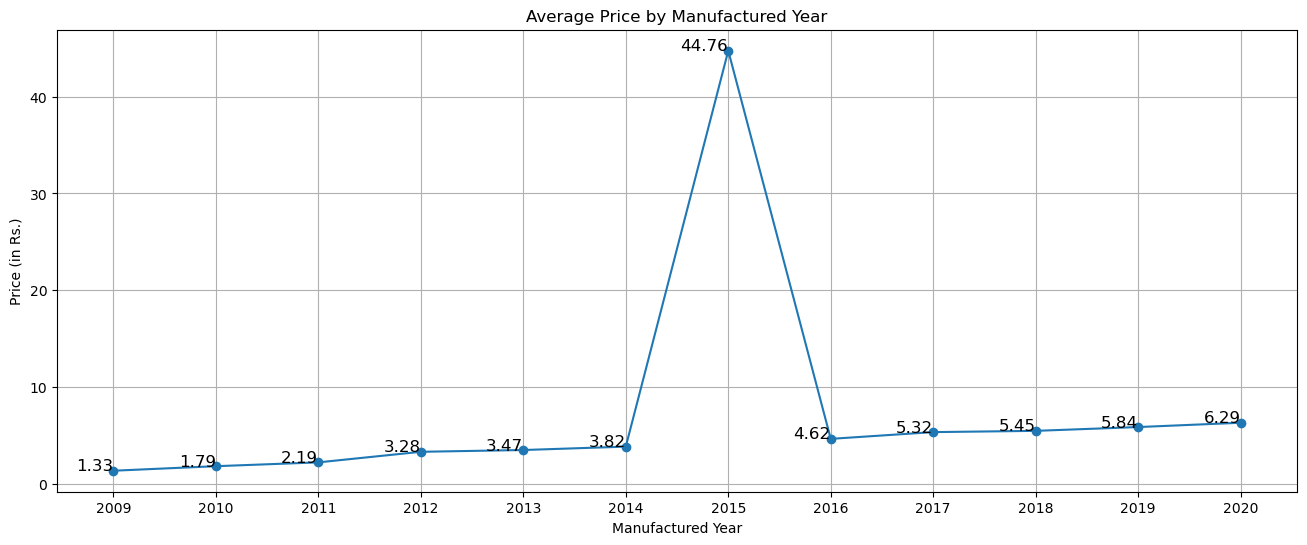

In [57]:
# Group by 'Manufactured_Year' and calculate the average price for each year
average_price_by_year = dio.groupby('Manufactured_Year')['Price'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(16, 6))
plt.plot(average_price_by_year['Manufactured_Year'], average_price_by_year['Price'], marker='o')

# Annotate each data point with its average price
for i in range(len(average_price_by_year)):
    plt.text(average_price_by_year['Manufactured_Year'][i], average_price_by_year['Price'][i],
             f"{average_price_by_year['Price'][i]:.2f}", fontsize=12, ha='right')

plt.title('Average Price by Manufactured Year')
plt.xlabel('Manufactured Year')
plt.ylabel('Price (in Rs.)')
plt.grid(True)
plt.xticks(average_price_by_year['Manufactured_Year'])  # Ensure all years are shown on the x-axis
plt.show()

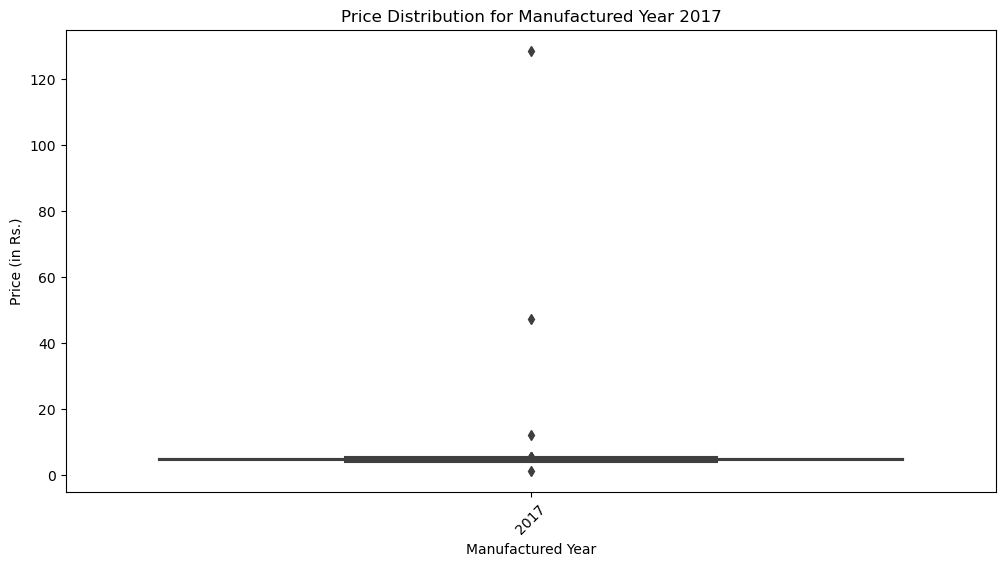

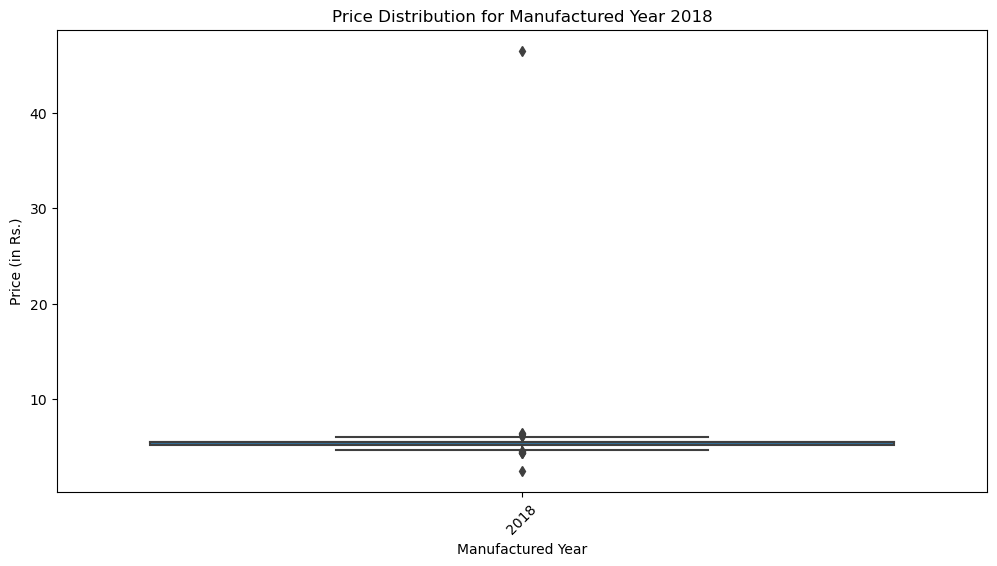

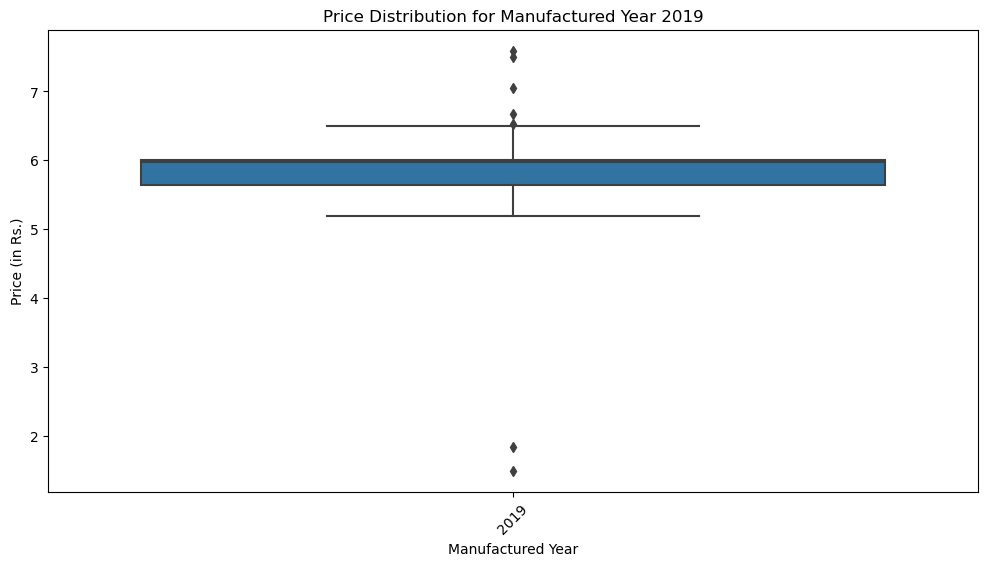

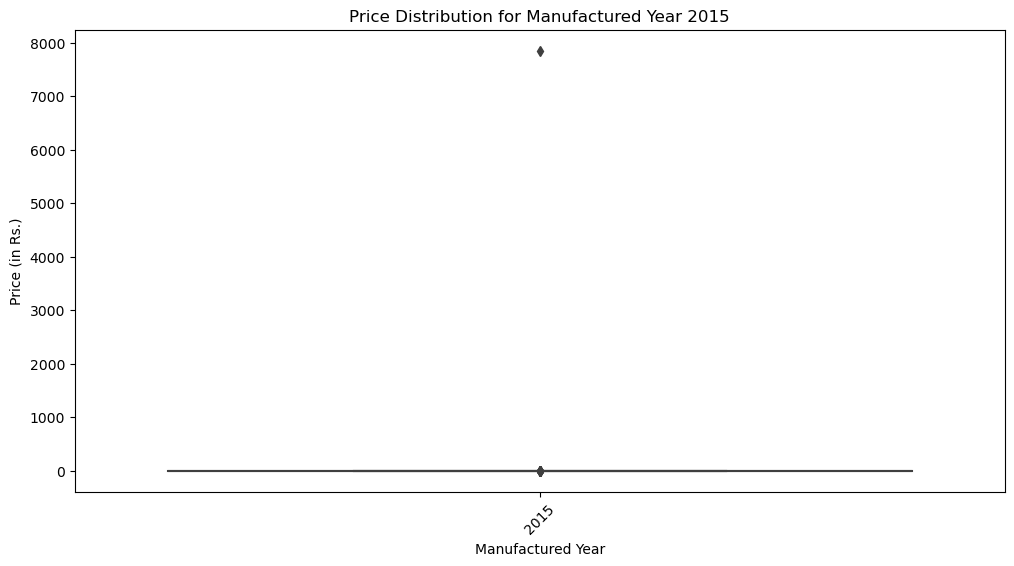

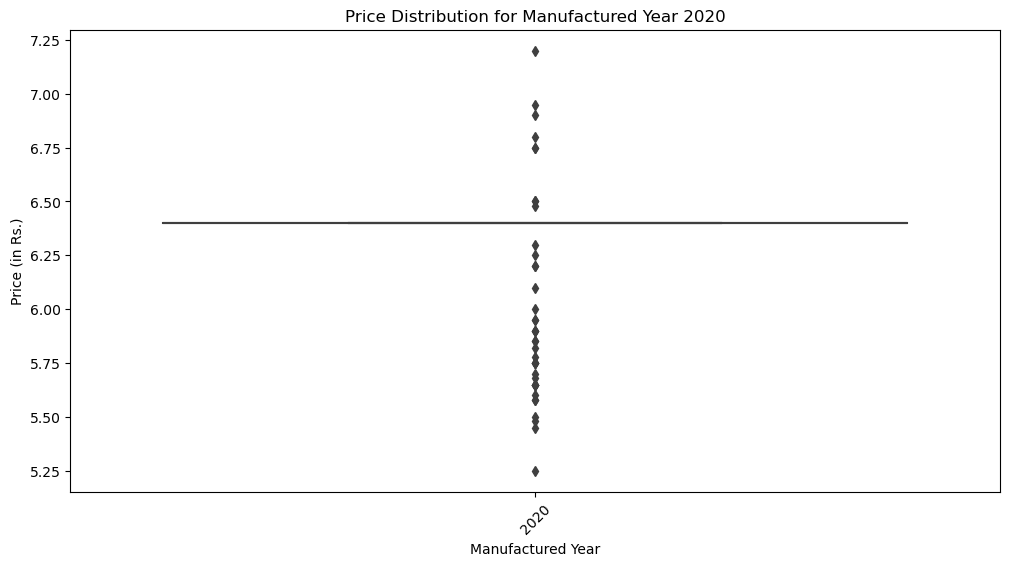

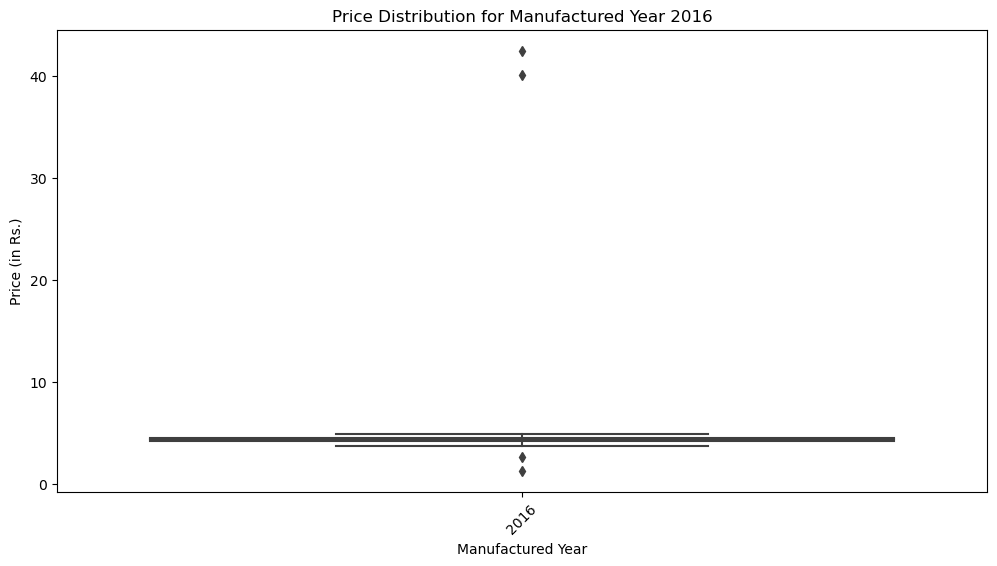

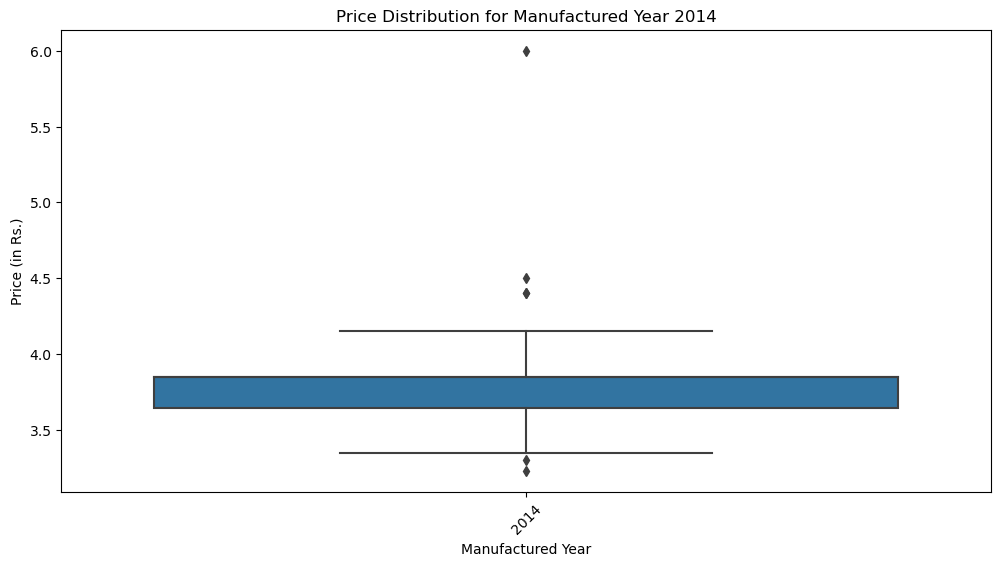

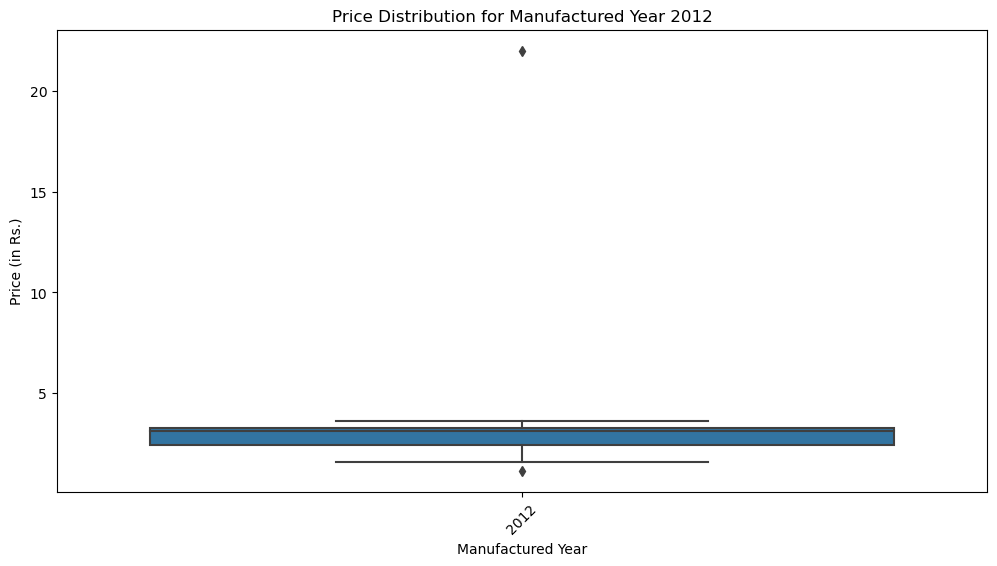

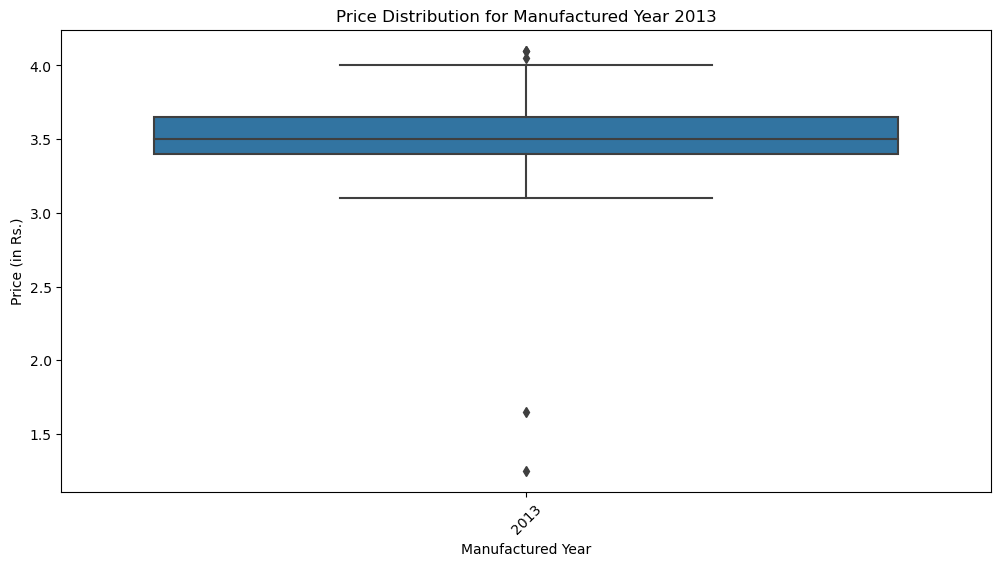

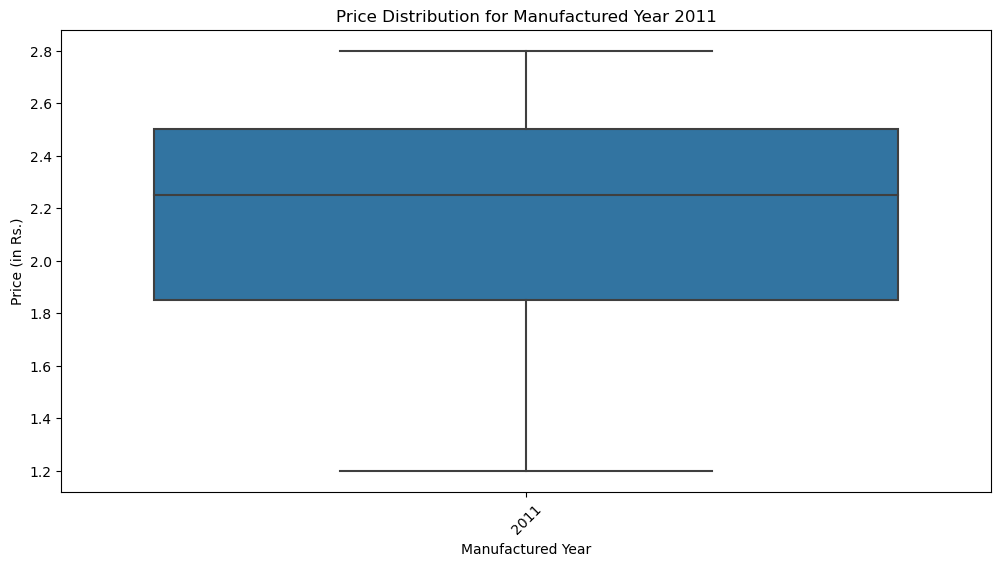

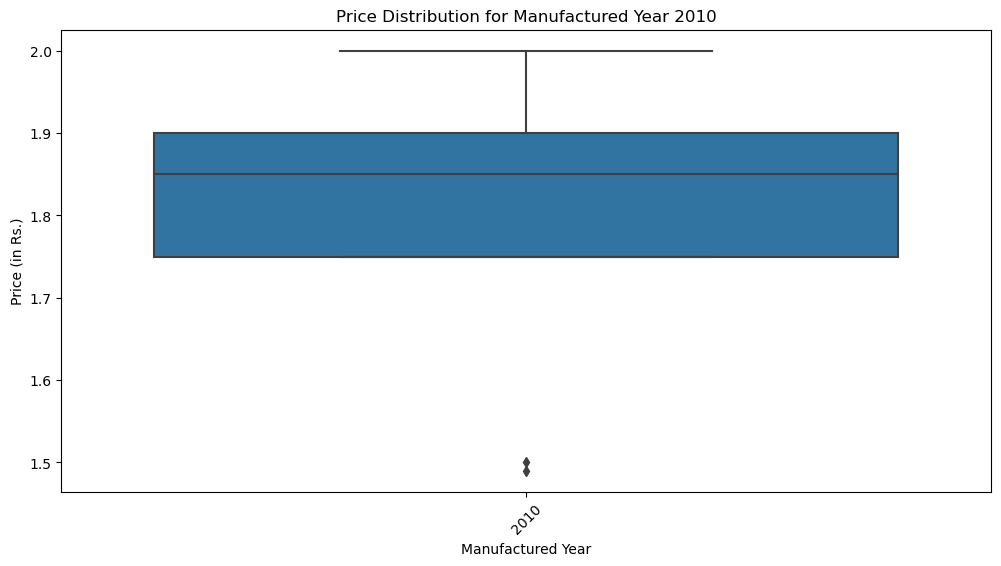

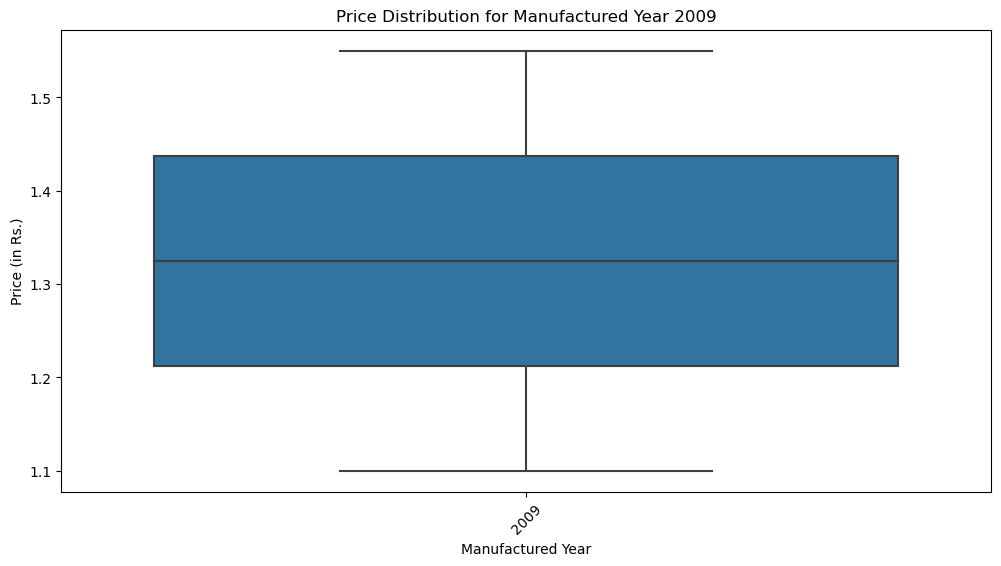

In [58]:


# Get unique years
unique_years = dio['Manufactured_Year'].unique()

# Loop through each unique year and plot the boxplot
for year in unique_years:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Manufactured_Year', y='Price', data=dio[dio['Manufactured_Year'] == year])
    plt.title(f'Price Distribution for Manufactured Year {year}')
    plt.xlabel('Manufactured Year')
    plt.ylabel('Price (in Rs.)')
    plt.xticks(rotation=45)
    plt.show()

# Price

### 2010 DIO Price

In [59]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2010) & (dio['Price'] < 1.7)]

# Display the filtered DataFrame
print(filtered_dio)

     Price  Mileage  Published_Year  Manufactured_Year      Province
513   1.50       56            2024               2010  Sabaragamuwa
752   1.49    41000            2024               2010      Southern


In [60]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2010) & (dio['Price'] < 1.7)].index)

### 2012 DIO Price

In [61]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2012) & (dio['Price'] > 3.25)]

# Display the filtered DataFrame
print(filtered_dio)

     Price   Mileage  Published_Year  Manufactured_Year       Province
40    3.35     35000            2024               2012        Central
48    3.28     41000            2024               2012        Western
74    3.58     36650            2024               2012  North Western
88    3.28     35263            2024               2012       Southern
142   3.40     37452            2024               2012       Southern
171   3.60     35000            2024               2012        Western
194  22.00      1234            2024               2012        Western
243   3.35  20240122            2024               2012   Sabaragamuwa
733   3.60     39000            2024               2012        Western
929   3.50  20231219            2023               2012  North Western


In [62]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2012) & (dio['Price'] > 3.25)].index)

# Display the modified DataFrame
print(dio)

          Price  Mileage  Published_Year  Manufactured_Year       Province
0       5.00000    39000            2024               2017        Western
1       5.78000    30000            2024               2018        Western
2       5.65000    15250            2024               2017       Southern
3       5.35000    44444            2024               2018  North Central
4     128.65588     4628            2024               2017        Western
...         ...      ...             ...                ...            ...
1902    6.40000    19625            2023               2020        Western
1903    3.55000    29800            2023               2015        Western
1904    4.75000    37000            2023               2017  North Western
1905    4.00000    37800            2023               2015  North Western
1906    5.10000    41500            2023               2018  North Western

[1866 rows x 5 columns]


### 2013 DIO Price

In [63]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2013) & (dio['Price'] > 3.6)]

# Display the filtered DataFrame
print(filtered_dio)

      Price  Mileage  Published_Year  Manufactured_Year       Province
107    4.00    99999            2024               2013  North Western
266    4.05    52800            2024               2013        Western
417    3.88    29000            2024               2013        Central
474    3.65    45000            2024               2013        Western
536    4.10    45000            2024               2013  North Western
627    3.75   228795            2024               2013        Central
680    3.65    52800            2024               2013        Western
709    3.75    26612            2024               2013        Western
721    3.80    26000            2024               2013        Western
1008   4.10    55000            2023               2013  North Western
1181   3.70    38000            2023               2013  North Western
1267   3.90    30000            2023               2013        Western


In [64]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2013) & (dio['Price'] < 2)].index)

# Display the modified DataFrame
print(dio)

          Price  Mileage  Published_Year  Manufactured_Year       Province
0       5.00000    39000            2024               2017        Western
1       5.78000    30000            2024               2018        Western
2       5.65000    15250            2024               2017       Southern
3       5.35000    44444            2024               2018  North Central
4     128.65588     4628            2024               2017        Western
...         ...      ...             ...                ...            ...
1902    6.40000    19625            2023               2020        Western
1903    3.55000    29800            2023               2015        Western
1904    4.75000    37000            2023               2017  North Western
1905    4.00000    37800            2023               2015  North Western
1906    5.10000    41500            2023               2018  North Western

[1864 rows x 5 columns]


In [65]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2013) & (dio['Price'] > 3.8)]

# Display the filtered DataFrame
print(filtered_dio)

      Price  Mileage  Published_Year  Manufactured_Year       Province
107    4.00    99999            2024               2013  North Western
266    4.05    52800            2024               2013        Western
417    3.88    29000            2024               2013        Central
536    4.10    45000            2024               2013  North Western
1008   4.10    55000            2023               2013  North Western
1267   3.90    30000            2023               2013        Western


In [66]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2013) & (dio['Price'] > 3.8)].index)

# Display the modified DataFrame
print(dio)

          Price  Mileage  Published_Year  Manufactured_Year       Province
0       5.00000    39000            2024               2017        Western
1       5.78000    30000            2024               2018        Western
2       5.65000    15250            2024               2017       Southern
3       5.35000    44444            2024               2018  North Central
4     128.65588     4628            2024               2017        Western
...         ...      ...             ...                ...            ...
1902    6.40000    19625            2023               2020        Western
1903    3.55000    29800            2023               2015        Western
1904    4.75000    37000            2023               2017  North Western
1905    4.00000    37800            2023               2015  North Western
1906    5.10000    41500            2023               2018  North Western

[1858 rows x 5 columns]


### 2014 DIO Price

In [67]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2014) & (dio['Price'] > 5)]

# Display the filtered DataFrame
print(filtered_dio)

      Price  Mileage  Published_Year  Manufactured_Year  Province
1308    6.0    71000            2023               2014  Southern


In [68]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2014) & (dio['Price'] > 5)].index)


### 2015 DIO Price

In [69]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2015) & (dio['Price'] > 5.50)]

# Display the filtered DataFrame
print(filtered_dio)

           Price  Mileage  Published_Year  Manufactured_Year  Province
1058  7850.02869    35000            2023               2015  Southern


In [70]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2015) & (dio['Price'] > 5.50)].index)

### 2016 DIO Price


In [71]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2016) & (dio['Price'] > 5)]
filtered_dio

,Price,Mileage,Published_Year,Manufactured_Year,Province
788,42.50,54500,2023,2016,North Western
1168,40.15,20231206,2023,2016,Western


In [72]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2016) & (dio['Price'] > 5.50)].index)

In [73]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2016) & (dio['Price'] <3.5)]
filtered_dio

,Price,Mileage,Published_Year,Manufactured_Year,Province
1000,1.3,2222,2023,2016,Western
1690,2.6,26000,2023,2016,North Western


In [74]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2016) & (dio['Price'] < 3.50)].index)

### 2017 DIO Price

In [75]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2017) & (dio['Price'] > 5.50)]

# Display the filtered DataFrame
print(filtered_dio)

         Price  Mileage  Published_Year  Manufactured_Year       Province
2      5.65000    15250            2024               2017       Southern
4    128.65588     4628            2024               2017        Western
751   12.34546    33000            2024               2017  North Western
814   47.50000   276000            2023               2017        Western
892    5.60000    29000            2023               2017  North Central


In [76]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2017) & (dio['Price'] > 6)].index)

# Display the modified DataFrame
print(dio)

      Price  Mileage  Published_Year  Manufactured_Year       Province
0      5.00    39000            2024               2017        Western
1      5.78    30000            2024               2018        Western
2      5.65    15250            2024               2017       Southern
3      5.35    44444            2024               2018  North Central
5      5.92    34000            2024               2019       Southern
...     ...      ...             ...                ...            ...
1902   6.40    19625            2023               2020        Western
1903   3.55    29800            2023               2015        Western
1904   4.75    37000            2023               2017  North Western
1905   4.00    37800            2023               2015  North Western
1906   5.10    41500            2023               2018  North Western

[1849 rows x 5 columns]


### 2018 DIO Price

In [77]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2018) & (dio['Price'] > 6)]

# Display the filtered DataFrame
print(filtered_dio)

     Price  Mileage  Published_Year  Manufactured_Year       Province
86    6.35    34500            2024               2018       Southern
153   6.10    50000            2024               2018        Western
160   6.10    35000            2024               2018        Western
195   6.50    24000            2024               2018  North Western
944  46.50   530000            2023               2018        Western


In [78]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2018) & (dio['Price'] >6.5)].index)

# Display the modified DataFrame
print(dio)

      Price  Mileage  Published_Year  Manufactured_Year       Province
0      5.00    39000            2024               2017        Western
1      5.78    30000            2024               2018        Western
2      5.65    15250            2024               2017       Southern
3      5.35    44444            2024               2018  North Central
5      5.92    34000            2024               2019       Southern
...     ...      ...             ...                ...            ...
1902   6.40    19625            2023               2020        Western
1903   3.55    29800            2023               2015        Western
1904   4.75    37000            2023               2017  North Western
1905   4.00    37800            2023               2015  North Western
1906   5.10    41500            2023               2018  North Western

[1848 rows x 5 columns]


### 2019 DIO Price

In [79]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2019) & (dio['Price'] <5)]

# Display the filtered DataFrame
print(filtered_dio)

      Price  Mileage  Published_Year  Manufactured_Year       Province
377    1.85    23152            2024               2019        Western
1595   1.50    27000            2023               2019  North Western


In [80]:
dio = dio.drop(dio[(dio['Manufactured_Year'] == 2019) & (dio['Price'] <5)].index)

# Display the modified DataFrame
print(dio)

      Price  Mileage  Published_Year  Manufactured_Year       Province
0      5.00    39000            2024               2017        Western
1      5.78    30000            2024               2018        Western
2      5.65    15250            2024               2017       Southern
3      5.35    44444            2024               2018  North Central
5      5.92    34000            2024               2019       Southern
...     ...      ...             ...                ...            ...
1902   6.40    19625            2023               2020        Western
1903   3.55    29800            2023               2015        Western
1904   4.75    37000            2023               2017  North Western
1905   4.00    37800            2023               2015  North Western
1906   5.10    41500            2023               2018  North Western

[1846 rows x 5 columns]


### 2020 DIO Price

In [81]:
# Filter the DataFrame based on the conditions
filtered_dio = dio[(dio['Manufactured_Year'] == 2020) & (dio['Price'] >6)]

# Display the filtered DataFrame
print(filtered_dio)

      Price  Mileage  Published_Year  Manufactured_Year       Province
12      6.4     9518            2024               2020  North Western
53      6.4     9610            2024               2020  North Western
73      6.9    28000            2024               2020        Western
87      6.4     5000            2024               2020   Sabaragamuwa
99      6.4     8380            2024               2020  North Western
...     ...      ...             ...                ...            ...
1760    6.4    21000            2023               2020        Western
1765    6.4    19863            2023               2020        Western
1823    6.4    30000            2023               2020  North Western
1852    6.4    19532            2023               2020        Western
1902    6.4    19625            2023               2020        Western

[122 rows x 5 columns]


In [82]:
dio.isnull().sum()

Price                0
Mileage              0
Published_Year       0
Manufactured_Year    0
Province             0
dtype: int64

### Get Distribution plot of Price 

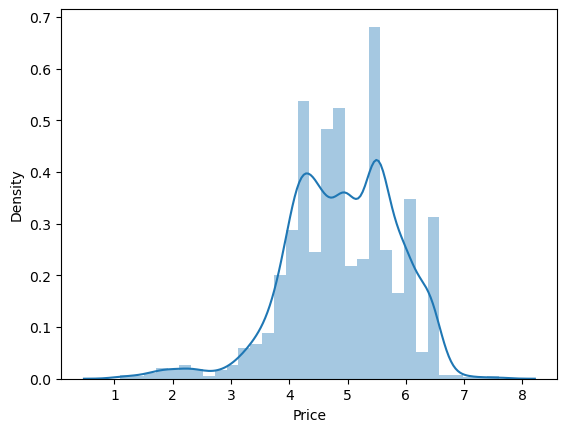

In [83]:
sns.distplot(dio["Price"])
plt.show()

### Get Barplot identify outliers of Price

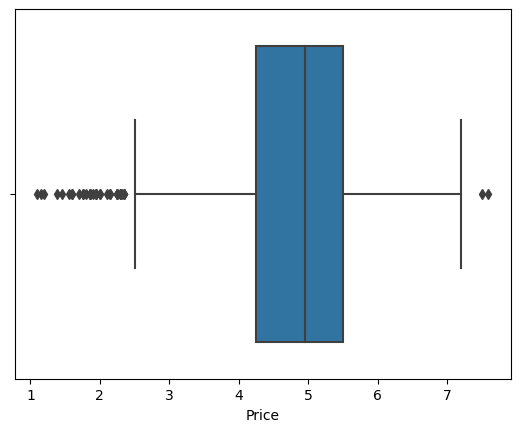

In [84]:
sns.boxplot(dio["Price"])
plt.show()

In [85]:
filtered_dio = dio[dio['Price'] > 7]
print("\nFiltered DataFrame (price > 7):")
print(filtered_dio)


Filtered DataFrame (price > 7):
      Price  Mileage  Published_Year  Manufactured_Year       Province
70     7.59     8000            2024               2019  North Central
98     7.50     5940            2024               2019        Western
770    7.05    14000            2023               2019       Southern
1631   7.20     8200            2023               2020  North Western


In [86]:
dio = dio[dio['Price'] <= 7]

In [87]:
Q1 = dio['Price'].quantile(0.25)
Q3 = dio['Price'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 :-",Q1)
print("Q3 :-",Q3)
print("IQR :-",IQR)

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound is:-",lower_bound)
print("Upper Bound is:-",upper_bound)

Q1 :- 4.25
Q3 :- 5.5
IQR :- 1.25
Lower Bound is:- 2.375
Upper Bound is:- 7.375


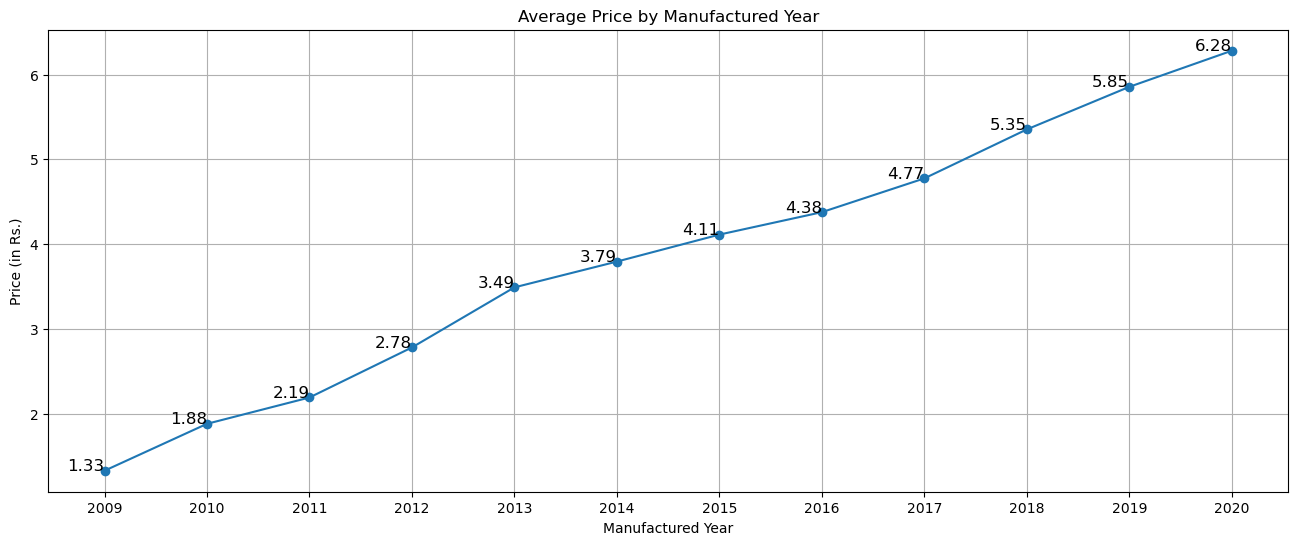

In [88]:
# Group by 'Manufactured_Year' and calculate the average price for each year
average_price_by_year = dio.groupby('Manufactured_Year')['Price'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(16, 6))
plt.plot(average_price_by_year['Manufactured_Year'], average_price_by_year['Price'], marker='o')

# Annotate each data point with its average price
for i in range(len(average_price_by_year)):
    plt.text(average_price_by_year['Manufactured_Year'][i], average_price_by_year['Price'][i],
             f"{average_price_by_year['Price'][i]:.2f}", fontsize=12, ha='right')

plt.title('Average Price by Manufactured Year')
plt.xlabel('Manufactured Year')
plt.ylabel('Price (in Rs.)')
plt.grid(True)
plt.xticks(average_price_by_year['Manufactured_Year'])  # Ensure all years are shown on the x-axis
plt.show()

### Getting Average price of every Year

In [89]:
price_year=dio.groupby(["Manufactured_Year"])["Price"].mean()
price_year

Manufactured_Year
2009    1.325000
2010    1.878571
2011    2.189052
2012    2.779750
2013    3.488571
2014    3.792889
2015    4.111224
2016    4.375899
2017    4.774479
2018    5.352389
2019    5.854718
2020    6.280872
Name: Price, dtype: float64

### Getting Boxplot Year vs Price :- To identify outliers

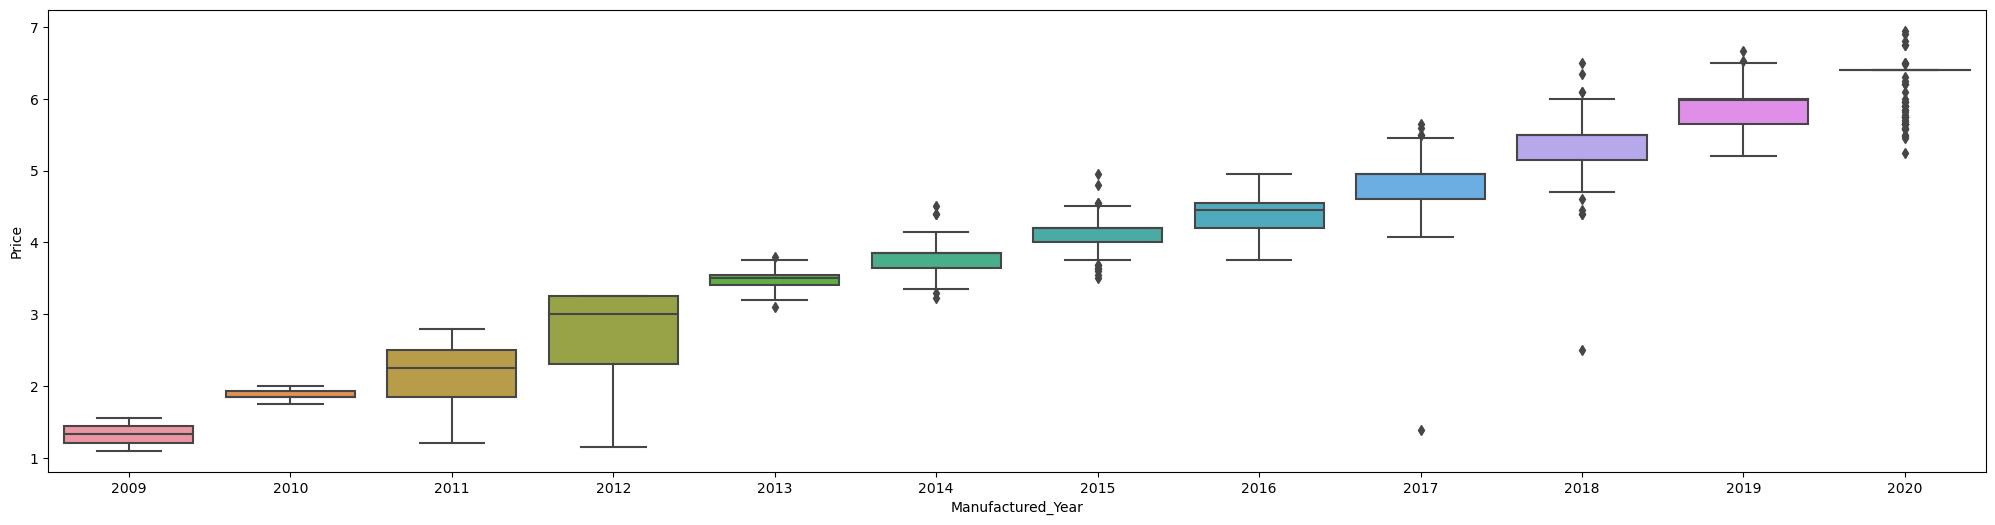

In [90]:
plt.figure(figsize=(25,6))
sns.boxplot(x="Manufactured_Year",y="Price",data=dio)
plt.show()

# Mileage

### Normally Sccoty milage are below 1e5 in selling market

In [91]:
filter_data=dio[dio["Mileage"]>1e5]
filter_data

,Price,Mileage,Published_Year,Manufactured_Year,Province
13,4.55,20240126,2024,2016,North Western
14,5.30,340000,2024,2018,Western
57,5.85,20240126,2024,2019,North Central
58,5.15,20240126,2024,2017,North Central
59,5.65,20240126,2024,2018,North Central
...,...,...,...,...,...
1855,4.95,20231101,2023,2017,Central
1888,6.00,20231030,2023,2019,Western
1889,4.55,20231030,2023,2016,Western
1897,3.95,20231029,2023,2016,Uva


In [92]:
dio.loc[dio['Mileage'] > 100000, 'Mileage'] = 85000

In [93]:
dio.describe()

,Price,Mileage,Published_Year,Manufactured_Year
count,1842.000000,1842.000000,1842.000000,1842.000000
mean,4.907625,36951.833876,2023.393051,2016.988599
std,0.929277,21801.735085,0.488561,2.024666
min,1.100000,1.000000,2023.000000,2009.000000
25%,4.250000,24000.000000,2023.000000,2016.000000
50%,4.950000,32000.000000,2023.000000,2017.000000
75%,5.500000,45000.000000,2024.000000,2018.000000
max,6.950000,100000.000000,2024.000000,2020.000000


<AxesSubplot:xlabel='Mileage'>

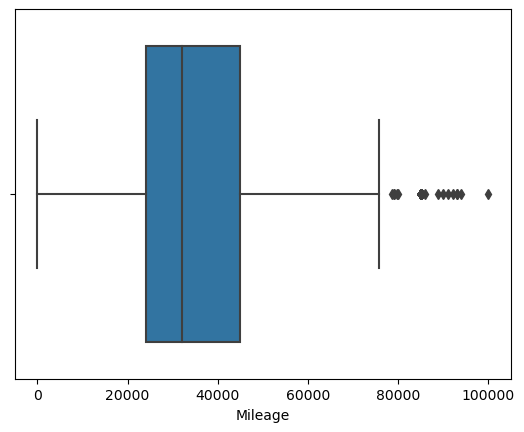

In [94]:
sns.boxplot(dio["Mileage"])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

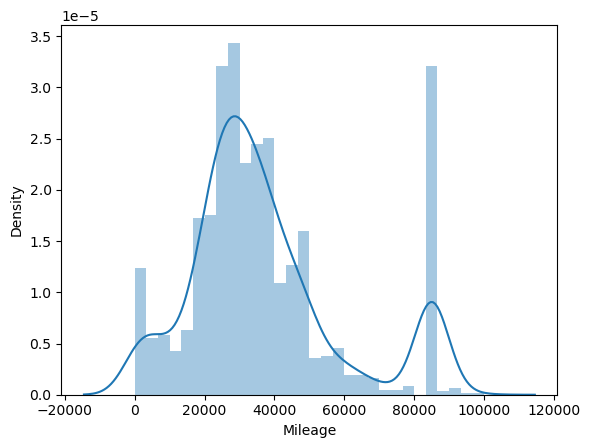

In [95]:
sns.distplot(dio["Mileage"])

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dio['Province_Encoded'] = le.fit_transform(dio['Province'])

In [97]:
corr=dio.corr()

<AxesSubplot:>

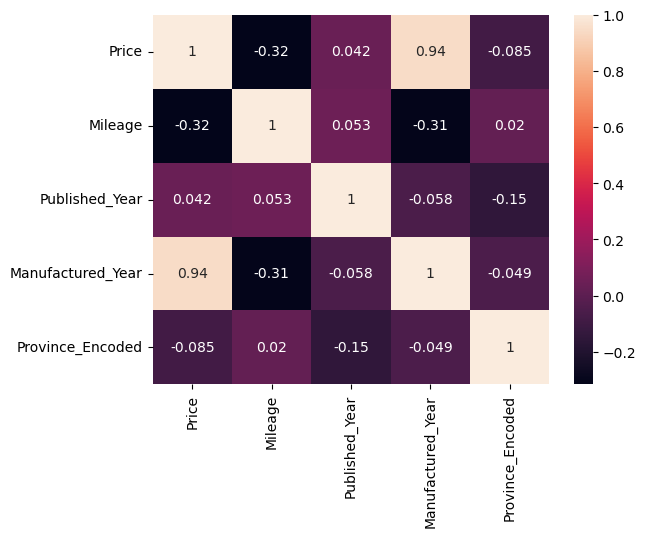

In [98]:
sns.heatmap(dio.corr(),annot=True)

In [99]:
dio.describe(include="object")

,Province
count,1842
unique,9
top,Western
freq,952


In [100]:
numerical_columns = dio.select_dtypes(include=['object']).columns

print(numerical_columns)

Index(['Province'], dtype='object')


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'Province' column using LabelEncoder
le = LabelEncoder()
dio['Province_Encoded'] = le.fit_transform(dio['Province'])


# Define feature columns and target variable
feature_cols = ['Mileage', 'Published_Year', 'Manufactured_Year', 'Province_Encoded']
X = dio[feature_cols]
y = dio['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [102]:
X_train.head()

,Mileage,Published_Year,Manufactured_Year,Province_Encoded
613,62000,2024,2017,3
987,5000,2023,2020,3
1693,85000,2023,2016,8
1420,26000,2023,2018,6
1391,33800,2023,2019,8


### Model Training

In [103]:
def model_acc(model):
    model.fit(X_train,y_train)
    accuracy = model.score(X_test,y_test)
    print(f'{model} accuracy: {accuracy}')
    

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() accuracy: 0.8673840521244546
Lasso() accuracy: 0.5649494923647949
DecisionTreeRegressor() accuracy: 0.840059028430379
RandomForestRegressor() accuracy: 0.870412019902658


### Hpper Parameter tuning

In [105]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_

best_model.score(X_test, y_test)

0.8742194316342617

In [106]:
new_data = {
    'Mileage': [12000],
    'Published_Year': [2024],
    'Manufactured_Year': [2016],
    'Province': ['Western']  # New province
}

In [107]:
# Create DataFrame for new values
new_df = pd.DataFrame(new_data)
le = LabelEncoder()
new_df['Province_Encoded'] = le.fit_transform(new_df['Province'])
feature_cols = ['Mileage', 'Published_Year', 'Manufactured_Year', 'Province_Encoded']

In [108]:
# Prepare features for prediction
X_new = new_df[feature_cols]

# Make predictions using the Lasso model
y_pred_new1 = best_model.predict(X_new)


# Print the predicted prices
print(f"Prediction:{y_pred_new1}\n")


Prediction:[4.4308]



### Save Model

In [ ]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

### Linear Regression Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score




# Encode the 'Province' column using LabelEncoder
le = LabelEncoder()
dio['Province_Encoded'] = le.fit_transform(dio['Province'])
print("\nDataFrame with Encoded 'Province':")
print(dio)

# Define feature columns and target variable
feature_cols = ['Mileage', 'Published_Year', 'Manufactured_Year', 'Province_Encoded']
X = dio[feature_cols]
y = dio['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining and Testing Sets Split:")
print("X_train:")
print(X_train)
print("X_test:")
print(X_test)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("\nPredicted Prices:")
print(y_pred)

# Evaluate the model
Linear_mse = mean_squared_error(y_test, y_pred)
Linear_r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error: {Linear_mse}")
print(f"R^2 Score: {Linear_r2}")

# Print model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Optional: Combine true and predicted prices for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted Prices:")
print(comparison)



DataFrame with Encoded 'Province':
      Price  Mileage  Published_Year  Manufactured_Year       Province  \
0      5.00    39000            2024               2017        Western   
1      5.78    30000            2024               2018        Western   
2      5.65    15250            2024               2017       Southern   
3      5.35    44444            2024               2018  North Central   
5      5.92    34000            2024               2019       Southern   
...     ...      ...             ...                ...            ...   
1902   6.40    19625            2023               2020        Western   
1903   3.55    29800            2023               2015        Western   
1904   4.75    37000            2023               2017  North Western   
1905   4.00    37800            2023               2015  North Western   
1906   5.10    41500            2023               2018  North Western   

      Province_Encoded  
0                    8  
1                    8  



Average Actual and Predicted Prices per Year:
                     Actual  Predicted
Manufactured_Year                     
2009               1.550000   1.410772
2010               1.750000   1.963103
2011               2.090000   2.359181
2012               2.915000   2.741087
2013               3.507500   3.251407
2014               3.705789   3.568786
2015               4.074833   4.044700
2016               4.364909   4.465089
2017               4.714035   4.928743
2018               5.327474   5.359061
2019               5.865000   5.790797
2020               6.264828   6.244565


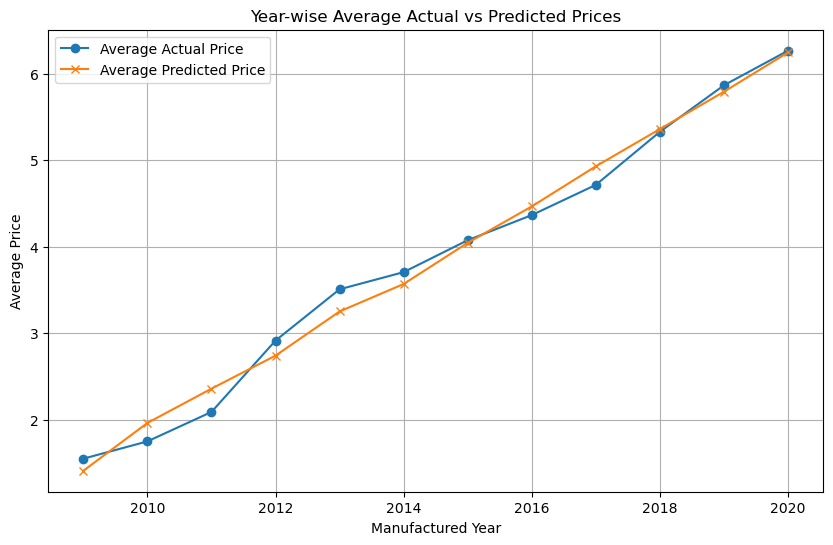

In [ ]:
# Combine true and predicted prices for comparison with Manufactured_Year
comparison = pd.DataFrame({'Manufactured_Year': X_test['Manufactured_Year'], 'Actual': y_test.values, 'Predicted': y_pred})

# Calculate average prices per year
comparison_avg = comparison.groupby('Manufactured_Year').mean()
print("\nAverage Actual and Predicted Prices per Year:")
print(comparison_avg)

# Create a line chart representing year-wise average price
plt.figure(figsize=(10, 6))
plt.plot(comparison_avg.index, comparison_avg['Actual'], label='Average Actual Price', marker='o')
plt.plot(comparison_avg.index, comparison_avg['Predicted'], label='Average Predicted Price', marker='x')
plt.title('Year-wise Average Actual vs Predicted Prices')
plt.xlabel('Manufactured Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metrics': ['MSE', 'RMSE', 'MAPE'],
    'Model Fitting': [train_mse, train_rmse, train_mape],
    'Model Verification': [test_mse, test_rmse, test_mape]
})

print("\nModel Performance Metrics (Linear Regression):")
print(metrics_df)




Model Performance Metrics (Linear Regression):
  Metrics  Model Fitting  Model Verification
0     MSE       0.074243            0.128769
1    RMSE       0.272477            0.358845
2    MAPE       0.048200            0.057229


### Ridge  Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
# Encode the 'Province' column using LabelEncoder
le = LabelEncoder()
dio['Province_Encoded'] = le.fit_transform(dio['Province'])
print("\nDataFrame with Encoded 'Province':")
print(dio)

# Define feature columns and target variable
feature_cols = ['Mileage', 'Published_Year', 'Manufactured_Year', 'Province_Encoded']
X = dio[feature_cols]
y = dio['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining and Testing Sets Split:")
print("X_train:")
print(X_train)
print("X_test:")
print(X_test)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)



# Train the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set using the Ridge model
y_pred_ridge = ridge_model.predict(X_test)
print("\nPredicted Prices (Ridge Regression):")
print(y_pred_ridge)

# Evaluate the Ridge regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R^2 Score: {r2_ridge}")

# Print Ridge model coefficients
print("\nRidge Regression Model Coefficients:")
print(f"Intercept: {ridge_model.intercept_}")
print(f"Coefficients: {ridge_model.coef_}")

# Optional: Combine true and predicted prices for comparison (Linear vs Ridge)
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Ridge': y_pred_ridge
})



DataFrame with Encoded 'Province':
      Price  Mileage  Published_Year  Manufactured_Year       Province  \
0      5.00    39000            2024               2017        Western   
1      5.78    30000            2024               2018        Western   
2      5.65    15250            2024               2017       Southern   
3      5.35    44444            2024               2018  North Central   
5      5.92    34000            2024               2019       Southern   
...     ...      ...             ...                ...            ...   
1902   6.40    19625            2023               2020        Western   
1903   3.55    29800            2023               2015        Western   
1904   4.75    37000            2023               2017  North Western   
1905   4.00    37800            2023               2015  North Western   
1906   5.10    41500            2023               2018  North Western   

      Province_Encoded  
0                    8  
1                    8  



Average Actual and Predicted Prices per Year:
                     Actual  Predicted
Manufactured_Year                     
2009               1.550000   1.410772
2010               1.750000   1.963103
2011               2.090000   2.359181
2012               2.915000   2.741087
2013               3.507500   3.251407
2014               3.705789   3.568786
2015               4.074833   4.044700
2016               4.364909   4.465089
2017               4.714035   4.928743
2018               5.327474   5.359061
2019               5.865000   5.790797
2020               6.264828   6.244565


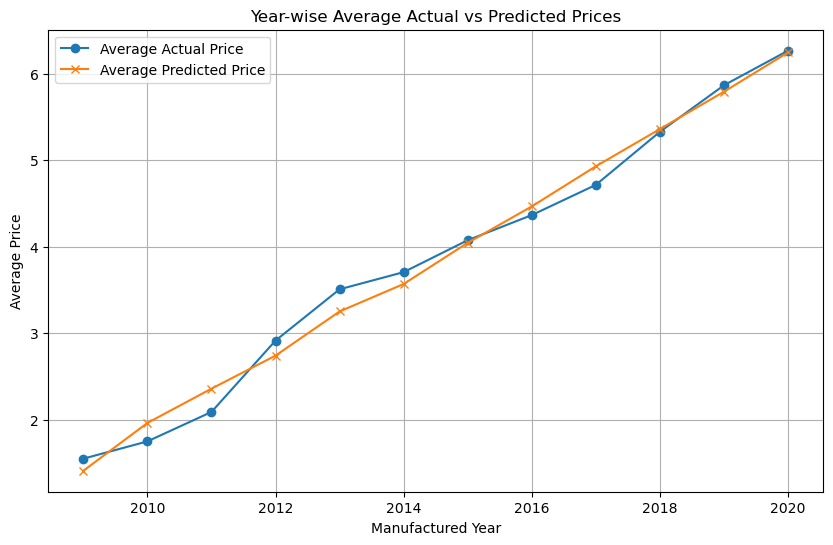

In [ ]:
# Combine true and predicted prices for comparison with Manufactured_Year
comparison = pd.DataFrame({'Manufactured_Year': X_test['Manufactured_Year'], 'Actual': y_test.values, 'Predicted': y_pred})

# Calculate average prices per year
comparison_avg = comparison.groupby('Manufactured_Year').mean()
print("\nAverage Actual and Predicted Prices per Year:")
print(comparison_avg)

# Create a line chart representing year-wise average price
plt.figure(figsize=(10, 6))
plt.plot(comparison_avg.index, comparison_avg['Actual'], label='Average Actual Price', marker='o')
plt.plot(comparison_avg.index, comparison_avg['Predicted'], label='Average Predicted Price', marker='x')
plt.title('Year-wise Average Actual vs Predicted Prices')
plt.xlabel('Manufactured Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Make predictions on both training and test sets
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge regression model on the training set
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_mape_ridge = mean_absolute_percentage_error(y_train, y_train_pred_ridge)

# Evaluate the Ridge regression model on the test set
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_mape_ridge = mean_absolute_percentage_error(y_test, y_test_pred_ridge)

# Create a DataFrame to display the metrics for the Ridge model
metrics_df = pd.DataFrame({
    'Metrics': ['MSE', 'RMSE', 'MAPE'],
    'Model Fitting': [train_mse_ridge, train_rmse_ridge, train_mape_ridge],
    'Model Verification': [test_mse_ridge, test_rmse_ridge, test_mape_ridge]
})

print("\nModel Performance Metrics(Ridge Regression):")
print(metrics_df)



Model Performance Metrics(Ridge Regression):
  Metrics  Model Fitting  Model Verification
0     MSE       0.074244            0.128769
1    RMSE       0.272477            0.358844
2    MAPE       0.048198            0.057229


### Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

le = LabelEncoder()
dio['Province_Encoded'] = le.fit_transform(dio['Province'])

# Define feature columns and target variable
feature_cols = ['Mileage', 'Published_Year', 'Manufactured_Year', 'Province_Encoded']
X = dio[feature_cols]
y = dio['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso regression model
lasso_model = Lasso(alpha=0.05)  # You can adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions on the test set using the Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print Lasso model evaluation metrics
print("Lasso Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R^2 Score: {r2_lasso}")

# Print Lasso model coefficients
print("\nLasso Regression Model Coefficients:")
print(f"Intercept: {lasso_model.intercept_}")
print(f"Coefficients: {lasso_model.coef_}")

# Optional: Combine true and predicted prices for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
print("\nComparison of Actual vs Predicted Prices (Lasso Regression):")
print(comparison)

Lasso Regression Model Evaluation:
Mean Squared Error: 0.13765533158155335
R^2 Score: 0.8582327813055071

Lasso Regression Model Coefficients:
Intercept: -832.6544641811129
Coefficients: [-1.48003568e-06  0.00000000e+00  4.15303926e-01 -7.32523770e-03]

Comparison of Actual vs Predicted Prices (Lasso Regression):
      Actual  Predicted
1616    4.45   4.902559
1204    5.50   5.330983
371     4.95   4.895750
1061    4.20   4.413845
1447    4.00   4.535573
...      ...        ...
979     5.40   5.374321
1273    4.30   4.469198
1320    5.10   5.288404
1844    5.60   5.744119
550     5.95   5.738934

[369 rows x 2 columns]



Average Actual and Predicted Prices per Year:
                     Actual  Predicted
Manufactured_Year                     
2009               1.550000   1.410772
2010               1.750000   1.963103
2011               2.090000   2.359181
2012               2.915000   2.741087
2013               3.507500   3.251407
2014               3.705789   3.568786
2015               4.074833   4.044700
2016               4.364909   4.465089
2017               4.714035   4.928743
2018               5.327474   5.359061
2019               5.865000   5.790797
2020               6.264828   6.244565


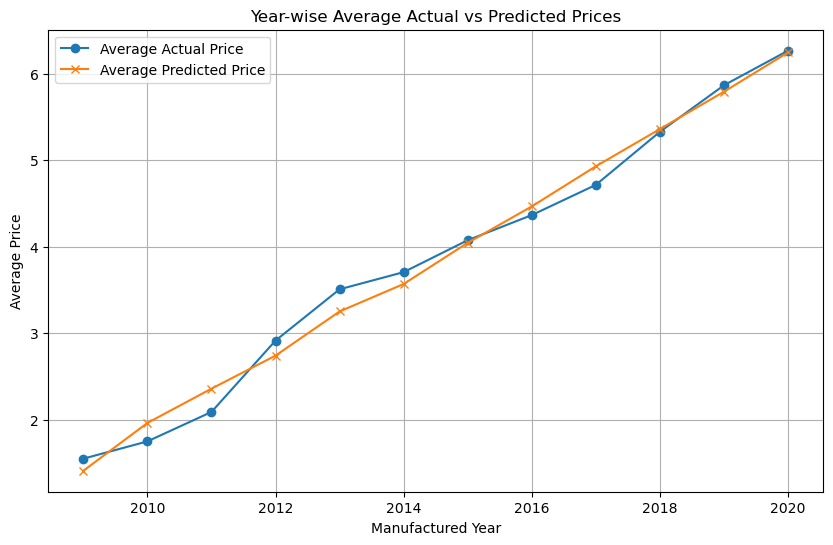

In [ ]:
# Combine true and predicted prices for comparison with Manufactured_Year
comparison = pd.DataFrame({'Manufactured_Year': X_test['Manufactured_Year'], 'Actual': y_test.values, 'Predicted': y_pred})

# Calculate average prices per year
comparison_avg = comparison.groupby('Manufactured_Year').mean()
print("\nAverage Actual and Predicted Prices per Year:")
print(comparison_avg)

# Create a line chart representing year-wise average price
plt.figure(figsize=(10, 6))
plt.plot(comparison_avg.index, comparison_avg['Actual'], label='Average Actual Price', marker='o')
plt.plot(comparison_avg.index, comparison_avg['Predicted'], label='Average Predicted Price', marker='x')
plt.title('Year-wise Average Actual vs Predicted Prices')
plt.xlabel('Manufactured Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluations

In [ ]:
# Make predictions on both training and test sets
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Ridge regression model on the training set
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
train_rmse_lasso = np.sqrt(train_mse_lasso)
train_mape_lasso = mean_absolute_percentage_error(y_train, y_train_pred_lasso)

# Evaluate the Ridge regression model on the test set
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_rmse_lasso = np.sqrt(test_mse_lasso)
test_mape_lasso = mean_absolute_percentage_error(y_test, y_test_pred_lasso)

# Create a DataFrame to display the metrics for the Ridge model
metrics_df = pd.DataFrame({
    'Metrics': ['MSE', 'RMSE', 'MAPE'],
    'Model Fitting': [train_mse_lasso, train_rmse_lasso, train_mape_lasso],
    'Model Verification': [test_mse_lasso, test_rmse_lasso, test_mape_lasso]
})

print("\nModel Performance Metrics(Lasso Regression):")
print(metrics_df)




Model Performance Metrics(Lasso Regression):
  Metrics  Model Fitting  Model Verification
0     MSE       0.082486            0.137655
1    RMSE       0.287204            0.371019
2    MAPE       0.050000            0.060049


# Predictions

In [ ]:
new_data = {
    'Mileage': [12000],
    'Published_Year': [2024],
    'Manufactured_Year': [2016],
    'Province': ['Western']  # New province
}

In [ ]:
# Create DataFrame for new values
new_df = pd.DataFrame(new_data)
le = LabelEncoder()
new_df['Province_Encoded'] = le.fit_transform(new_df['Province'])
feature_cols = ['Mileage', 'Published_Year', 'Manufactured_Year', 'Province_Encoded']

In [ ]:
# Prepare features for prediction
X_new = new_df[feature_cols]

# Make predictions using the Lasso model
y_pred_new1 = model.predict(X_new)
y_pred_new2 = ridge_model.predict(X_new)
y_pred_new3 = lasso_model.predict(X_new)

# Print the predicted prices
print(f"Linear Regression Model:{y_pred_new1}\n")
print(f"Ridge Model:{y_pred_new2}\n")
print(f"Lasso Model:{y_pred_new3}")

In [ ]:
# Prepare features for prediction
X_new = new_df[feature_cols]

# Make predictions using the Lasso model
y_pred_new1 = model.predict(X_new)
y_pred_new2 = ridge_model.predict(X_new)
y_pred_new3 = lasso_model.predict(X_new)

# Print the predicted prices
print(f"Linear Regression Model:{y_pred_new1}\n")
print(f"Ridge Model:{y_pred_new2}\n")
print(f"Lasso Model:{y_pred_new3}")


Linear Regression Model:[4.67613829]

Ridge Model:[4.67603407]

Lasso Model:[4.58048936]
